# PA 3: Association Analysis - Apriori Algorithm

## Student Details




## Submission Instructions


Step 1: Create a folder and name it 'yourNetID_PA3'

Step 2: Rename this submission file as 'yourNetID_PA3.ipynb' and place it inside the folder 'yourNetID_PA3'

Step 3: Rename the updated dataset file 'dataset.csv' and place it inside the folder 'yourNetID_PA3'  

Step 4: Your submission folder should include ONLY the following files:
    * apriory.py,
    * yourNetID_PA3.ipynb, 
    * dataset.csv,
    * toyDS.csv

Step 5: Zip this folder and submit it on BB. Your final submission folder name should be 'yourNetID_PA3.ZIP'


## Programming Assignment Details

Before you start:
- Note that this is an individual assignment.
- Be familiar with the algorithm and with the dataset.
- If you use external sources make sure that you cite them, and be specific! 
- Make sure that your code is running before you upload your submission file. TA will not debug your code.
- Start early!


For this assignment, you will have to use:
* Jupyter notebook, 
* the 'Random Shopping cart' dataset [01],
* and the Apriori Algorithm (apriory.py)[02]. Note that the apriory.py file is modified to run with Python 3.

## - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - - - - - - - - - - -

In [35]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [36]:
# Import your Libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Load apriori algorithm
import apriori as ap


### Task 1: DataSet Preprocess
Before you start you need to modify your dataset 'dataset_group.csv' to look like the toyDS.csv.  Each transaction is at one line with a variable length.  Discard the date attribute (1st attribute) from your dataset.  For example, in your dataset transaction#4 should look like: 
    
    cereals,juice,lunch meat,soda,toilet paper,all-purpose

Export your modified dataset in a file named 'dataset.csv'.

Use pandas to Read and Print the first 7 transactions of the 'dataset.csv'.


ScreenShot of the toyDS.csv


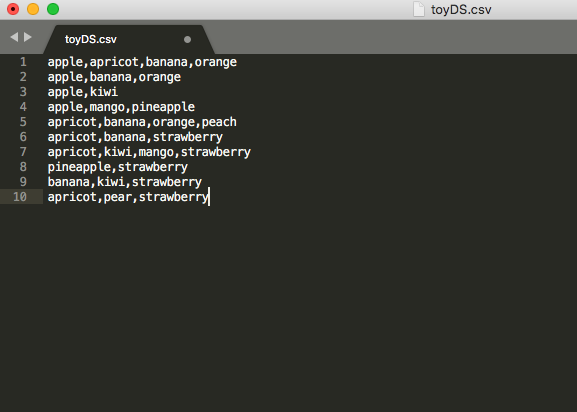

In [37]:
from IPython.display import Image
print ('ScreenShot of the toyDS.csv')
Image("SampleScreen01.png")

In [38]:
# # # # # # # # #  Code for Task 1 # # # # # # # # #
# Read the dataset_group.csv file into a data frame
data = pd.read_csv('dataset_group.csv',header=None)

# Drop first date column
df_mid = data.drop([0], axis=1)

# Append ',' symbol to the every cell
df_mid[2] = df_mid[2].astype(str) + ','

# Remove duplicate entries from transaction
df_noDup = df_mid.drop_duplicates()

# Group the elements and drop the column 1
df_final = df_noDup.groupby(1).sum().reset_index().drop([1], axis=1)

# Split the cell values into multiple columns
df = pd.DataFrame(df_final[2].str.split(',').values.tolist())

# Export results to CSV file
df.to_csv("dataset.csv",header=None,index=False)

# Read the dataset.csv file into a data frame
df = pd.read_csv('dataset.csv',header=None)

# Print first 7 rows of this data frame
pd.set_option('display.max_columns', 100)
df.head(7)


0             1              2           3             4   \
0             yogurt          pork  sandwich bags  lunch meat  all- purpose   
1       toilet paper       shampoo      hand soap     waffles    vegetables   
2               soda          pork           soap   ice cream  toilet paper   
3            cereals         juice     lunch meat        soda  toilet paper   
4    sandwich loaves         pasta      tortillas       mixes     hand soap   
5  laundry detergent  toilet paper           eggs  vegetables        bagels   
6   individual meals  paper towels      tortillas  vegetables          milk   

                             5           6                             7   \
0                         flour        soda                        butter   
1                       cheeses       mixes                          milk   
2                  dinner rolls   hand soap               spaghetti sauce   
3                  all- purpose         NaN                           NaN   
4                  toilet paper  vegetables                  paper towels   
5  dishwashing liquid/detergent     cereals                  paper towels   
6                     ice cream       juice  dishwashing liquid/detergent   

              8                  9                             10  \
0     vegetables               beef                 aluminum foil   
1  sandwich bags  laundry detergent  dishwashing liquid/detergent   
2           milk            ketchup               sandwich loaves   
3            NaN                NaN                           NaN   
4          flour               pork                       poultry   
5         butter            shampoo                          soap   
6           soap      sandwich bags                         pasta   

                 11               12                 13             14  \
0      dinner rolls          shampoo              mixes           soap   
1  individual meals           yogurt            cereals  aluminum foil   
2           poultry       vegetables  laundry detergent         bagels   
3               NaN              NaN                NaN            NaN   
4              eggs  spaghetti sauce               milk        waffles   
5             pasta       coffee/tea            poultry  aluminum foil   
6           ketchup     all- purpose             yogurt          mixes   

                  15            16            17               18      19  \
0  laundry detergent     ice cream           NaN              NaN     NaN   
1          tortillas           NaN           NaN              NaN     NaN   
2            shampoo    lunch meat       cereals          cheeses    eggs   
3                NaN           NaN           NaN              NaN     NaN   
4   individual meals  dinner rolls  all- purpose             soda  yogurt   
5    spaghetti sauce       ketchup  all- purpose             milk     NaN   
6       toilet paper          beef          eggs  spaghetti sauce  fruits   

    20   21   22   23   24   25  26  
0  NaN  NaN  NaN  NaN  NaN  NaN NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN NaN  
5  NaN  NaN  NaN  NaN  NaN  NaN NaN  
6  NaN  NaN  NaN  NaN  NaN  NaN NaN

In [39]:
# # #  Solution  # # #



### Task 2: Run apriory.py and Evaluate Results 

In this task, you have to find how you will be able to execute and print apriory results by making use only the apriory.py. In other words "DO NOT USE ANY OTHER LIBRARY FOR TASK 2!!!". 

(*) For those that are not familiar with python and coding this could be a quite demanding task.


You will have to execute apriori algorithm "3" times for different combinations of support and confidence.
Print the results of apriory for 'dataset.csv' by making use ONLY the provided methods. 

Do not forget to add your reasoning (explain the result outcome) at the top of each case in a nice and readable way. 

You are allowed to use the python print method to print your results. DO NOT add your reasoning as comments. 


In [40]:
print ('# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #') 
print ('Case 1 (minimum support=15% and minimum confidence=85%)')
print ('Case 1 Reasoning:')
print("\nIn this case, the value of confidence(X -> Y) is sufficiently high than support.It implies that people who buy X will \nmore likely buy Y than not buy Y.\n")
print("By analysing the dataset, we can conclude that vegetables are purchased more frequently than other items.\n")
print("We can confirm this by item sets which tell us that support of vegetable is 73.9%. By keeping confidence as \nhigh as 85%, we can derive the rules in which the items brought together with the vegetables are more frequent than those \nwhich are not with the vegetables.\n")
print("From the results, it is obvious that people buying food items like yogurt and eggs are more likely to buy vegetables.\n")
print ('Case 1 Output:')

# Pass the dataset file to 'dataFromFile' method and use the output in 'runApriori' method to get the rules and items.
items, rules = ap.runApriori(ap.dataFromFile('dataset.csv'),0.15,0.85)

# Print items and rules
ap.printResults(items, rules)

# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #
Case 1 (minimum support=15% and minimum confidence=85%)
Case 1 Reasoning:

In this case, the value of confidence(X -> Y) is sufficiently high than support.It implies that people who buy X will 
more likely buy Y than not buy Y.

By analysing the dataset, we can conclude that vegetables are purchased more frequently than other items.

We can confirm this by item sets which tell us that support of vegetable is 73.9%. By keeping confidence as 
high as 85%, we can derive the rules in which the items brought together with the vegetables are more frequent than those 
which are not with the vegetables.

From the results, it is obvious that people buying food items like yogurt and eggs are more likely to buy vegetables.

Case 1 Output:

------------ITEMS-----------------
item: ('shampoo', 'soda') , 0.150
item: ('pork', 'beef') , 0.150
item: ('sandwich loaves', 'shampoo') , 0.150
item: ('soda', 'mixes') , 0.150
item: ('pork', 'cheeses

In [41]:
print ('# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #') 
print ('Case 2 (minimum support=15% and minimum confidence=60%)')
print ('Case 2 Reasoning:')
print ("\nIn this case, the value of Confidence(X --> Y) > support(Y). Otherwise, rule will be misleading, because having item X \nactually reduces the chance of having item Y in the same transaction.\n") 
print ("This case can be counted as normal and average which gives the optimal solution. By keeping the minimum support lower, \nwe can increase number of candidates and max length of frequent itemsets. By keeping minimum confidence to 60% which is \naverage one, we have derived the rules with more then one items in the left.\n")
print ("In the results, we can see that there are more than one items in the left side of some of the rules.\n")
print ('Case 2 Output:')

# Pass the dataset file to 'dataFromFile' method and use the output in 'runApriori' method to get the rules and items.
items, rules = ap.runApriori(ap.dataFromFile('dataset.csv'),0.15,0.6)

# Print items and rules 
ap.printResults(items, rules)

# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #
Case 2 (minimum support=15% and minimum confidence=60%)
Case 2 Reasoning:

In this case, the value of Confidence(X --> Y) > support(Y). Otherwise, rule will be misleading, because having item X 
actually reduces the chance of having item Y in the same transaction.

This case can be counted as normal and average which gives the optimal solution. By keeping the minimum support lower, 
we can increase number of candidates and max length of frequent itemsets. By keeping minimum confidence to 60% which is 
average one, we have derived the rules with more then one items in the left.

In the results, we can see that there are more than one items in the left side of some of the rules.

Case 2 Output:

------------ITEMS-----------------
item: ('shampoo', 'soda') , 0.150
item: ('pork', 'beef') , 0.150
item: ('sandwich loaves', 'shampoo') , 0.150
item: ('soda', 'mixes') , 0.150
item: ('pork', 'cheeses') , 0.150
item: ('pork', 'cereals')

In [42]:
print ('# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #') 
print ('Case 3 (minimum support=30% and minimum confidence=80%)')
print ('Case 3 Reasoning:')

print ("\nHigher value of support results in less frequent itemsets. This may decrease the number of candidates and \nmax length of frequent itemsets.\n")
print ("In this case, the value of support is 30% which is almost the highest. By looking at the output, we can see that the number of itemsets are reduced as we choose the support with highest probability. Additionally, the confidence is also high.\nSo this combination leads the solution with the rules which have very less items in it.\n")
print ("For an example, every rule has only one item both the sides.\n")
print ('Case 3 Output:')
# Pass the dataset file to 'dataFromFile' method and use the output in 'runApriori' method to get the rules and items array.
items, rules = ap.runApriori(ap.dataFromFile('dataset.csv'),0.3,0.8)

# Print items and rules
ap.printResults(items, rules)

# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #
Case 3 (minimum support=30% and minimum confidence=80%)
Case 3 Reasoning:

Higher value of support results in less frequent itemsets. This may decrease the number of candidates and 
max length of frequent itemsets.

In this case, the value of support is 30% which is almost the highest. By looking at the output, we can see that the number of itemsets are reduced as we choose the support with highest probability. Additionally, the confidence is also high.
So this combination leads the solution with the rules which have very less items in it.

For an example, every rule has only one item both the sides.

Case 3 Output:

------------ITEMS-----------------
item: ('vegetables', 'bagels') , 0.300
item: ('ice cream', 'vegetables') , 0.303
item: ('soda', 'vegetables') , 0.306
item: ('vegetables', 'dishwashing liquid/detergent') , 0.306
item: ('vegetables', 'dinner rolls') , 0.308
item: ('cheeses', 'vegetables') , 0.309
item: ('laundry

# References

[01] https://www.kaggle.com/acostasg/random-shopping-cart

[02] https://github.com/asaini/Apriori


# Rubric
* [02 points] - Student Details 
* [08 points] - Comply with submission instructions 
* [30 points] - DataSet Preprocess 
* [30 points] - Run apriory.py
* [30 points] - Evaluate Results 
